In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv ('marketing_campaign_data.csv')
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,S1,S1,S1,S1,S3
Marital_Status,Lajang,Lajang,Bertunangan,Bertunangan,Menikah
Income,58138000.0,46344000.0,71613000.0,26646000.0,58293000.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [33]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [34]:
df.shape

(2240, 30)

### Feature Engineering

In [35]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2022 - df['Year_Birth']
df['Join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['Total_kids'] > 0, 1, 0)
df['Marital_Status'] = df['Marital_Status'].replace({'Lajang' : 'Single', 'Menikah' : 'Couple', 'Janda' : 'Single', 'Duda' : 'Single', 'Cerai' : 'Divorced', 'Bertunangan' : 'Couple'})

# group age range
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'Age_range'] = 'Child'
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'Age_range'] = 'Teens'
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'Age_range'] = 'Young adults'
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'Age_range'] = 'Middle age adults'
df.loc[(df['Age'] >= 55), 'Age_range'] = 'Older adults'

# total spending
df['Total_spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# total accept campaign
df['Total_accept_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# total transcation purchased 
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
# conversion rate
df['Conversion_rate'] = df.apply(lambda x: safe_div(x['Total_transactions'],x['NumWebVisitsMonth']), axis=1)

C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent p

### Exploratory Data Analysis: conversion rate based on income, spending, and age

In [36]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_spending', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate']
Data category:  ['Education', 'Marital_Status', 'Age_range']


In [37]:
# Numeric Feature
df[numerical_cols].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Age,Join_at_age,Total_kids,is_parents,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [38]:
# Categorical Feature
df[category_cols].describe()

,Education,Marital_Status,Age_range
count,2240,2240,2240
unique,5,3,3
top,S1,Couple,Middle age adults
freq,1127,1444,1139


<AxesSubplot:>

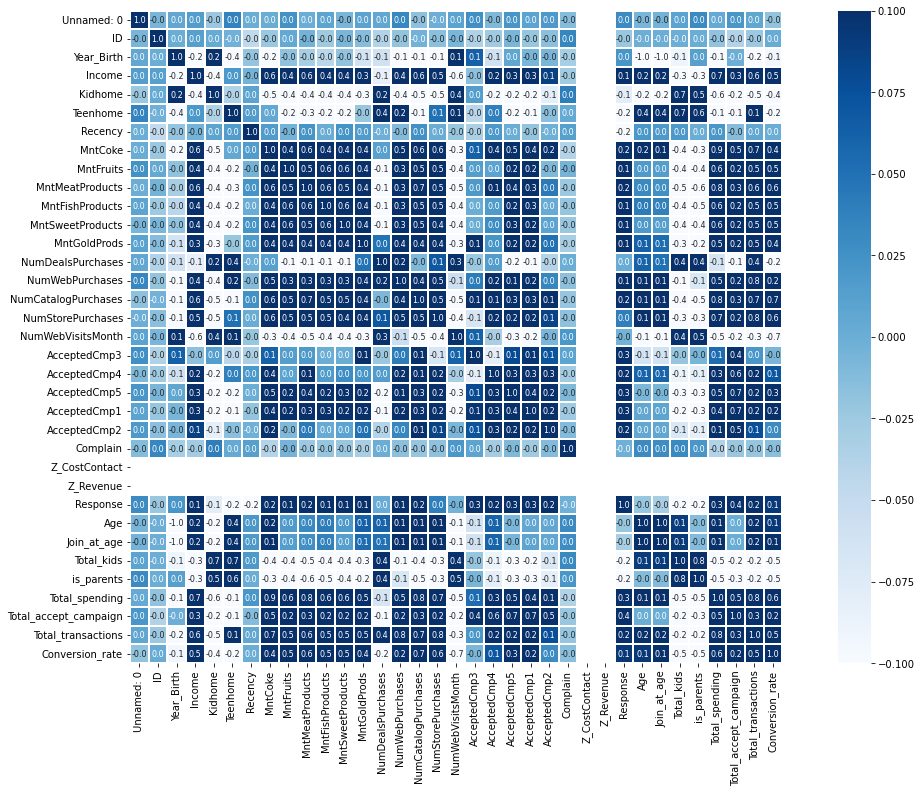

In [39]:
# Corelassion Heatmap
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

- Fitur conversion rate memiliki korelasi kuat positif terhadap fitur income, total_spending dan total_transactions
- Fitur conversion rate memiliki korelasi lemah positif terhadap age

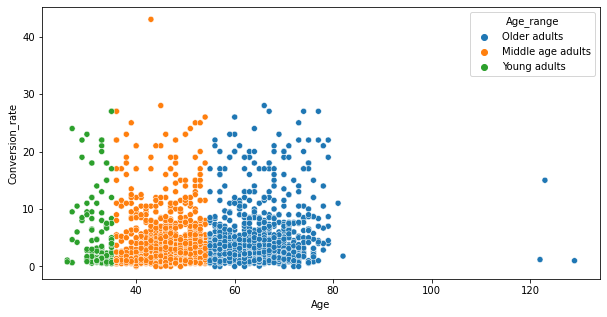

In [40]:
## Correlation Conversion Rate with age
fig, (ax1) = plt.subplots(figsize=(10,5))
sns.scatterplot(x = 'Age', y= 'Conversion_rate', hue='Age_range', data=df);

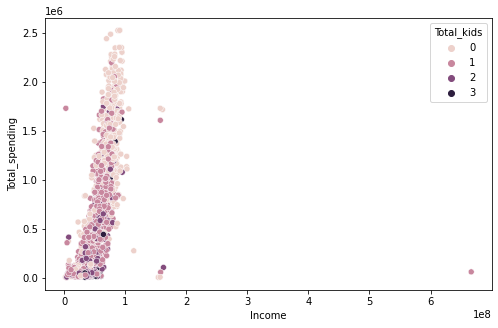

In [41]:
## Correlation total spending & income with total kids
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Income",y="Total_spending",data=df, hue='Total_kids');

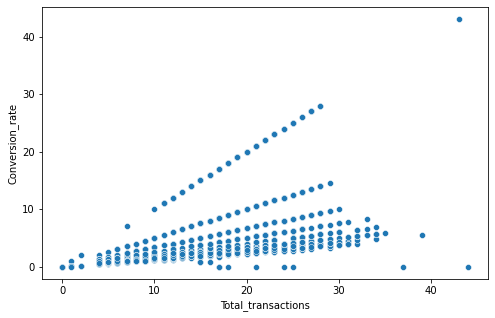

In [42]:
## Correlation total transactions & conversion rate 
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Total_transactions",y="Conversion_rate",data=df);

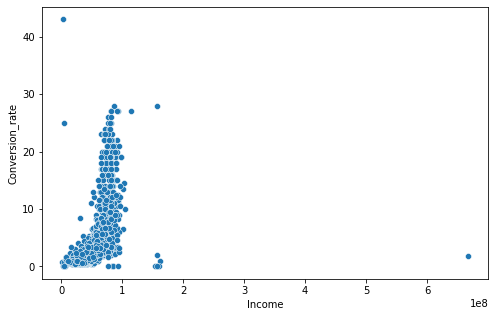

In [43]:
## Correlation conversion rate & income with total kids
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Income",y="Conversion_rate",data=df);

### Data Processing

In [44]:
#check data duplicate
df.duplicated().sum()

0

In [45]:
#check data null
df.isna().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Join_at_age               0
Total_kids                0
is_parents                0
Age_range                 0
Total_spending      

In [46]:
#check missing persen
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_percentage(df)

,Total,Percent
Income,24,1.07


In [47]:
#drop missing value income because under 5%
df= df.dropna()

In [48]:
# label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df['Education_mapped'] = df['Education'].map(mapping_education)

In [49]:
dataset_categorical = df[['Education']].copy()

In [50]:
# One hot encoder
for cat in ['Marital_Status', 'Age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_categorical = dataset_categorical.join(onehots)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2216 non-null   int64         
 1   ID                     2216 non-null   int64         
 2   Year_Birth             2216 non-null   int64         
 3   Education              2216 non-null   object        
 4   Marital_Status         2216 non-null   object        
 5   Income                 2216 non-null   float64       
 6   Kidhome                2216 non-null   int64         
 7   Teenhome               2216 non-null   int64         
 8   Dt_Customer            2216 non-null   datetime64[ns]
 9   Recency                2216 non-null   int64         
 10  MntCoke                2216 non-null   int64         
 11  MntFruits              2216 non-null   int64         
 12  MntMeatProducts        2216 non-null   int64         
 13  Mnt

In [52]:
df = df.drop(columns=['Unnamed: 0','ID', 'Recency', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'AcceptedCmp3','AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5'])

In [53]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Income', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_spending', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate', 'Education_mapped']
Data category:  ['Education', 'Marital_Status', 'Age_range']


In [54]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_cols:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head())

(2216, 28)

,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped
0,S1,Single,0.234063,-0.823039,-0.928972,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.986443,0.897752,-1.264803,-1.581389,Older adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,S1,Single,-0.234559,1.039938,0.909066,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,1.236801,1.313688,1.405806,0.632356,Older adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,S1,Couple,0.769478,-0.823039,-0.928972,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.318822,0.315443,-1.264803,-1.581389,Older adults,0.280250,-0.439265,0.797881,0.175797,-0.457733
3,S1,Couple,-1.017239,1.039938,-0.928972,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-1.266777,-1.181925,0.070501,0.632356,Middle age adults,-0.919224,-0.439265,-0.897205,-0.625532,-0.457733
4,S3,Couple,0.240221,1.039938,-0.928972,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-1.016420,-0.932363,0.070501,0.632356,Middle age adults,-0.307044,-0.439265,0.537099,-0.120865,1.533113


### Modeling

In [55]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2216 non-null   object 
 1   Marital_Status         2216 non-null   object 
 2   Income                 2216 non-null   float64
 3   Kidhome                2216 non-null   float64
 4   Teenhome               2216 non-null   float64
 5   MntCoke                2216 non-null   float64
 6   MntFruits              2216 non-null   float64
 7   MntMeatProducts        2216 non-null   float64
 8   MntFishProducts        2216 non-null   float64
 9   MntSweetProducts       2216 non-null   float64
 10  MntGoldProds           2216 non-null   float64
 11  NumDealsPurchases      2216 non-null   float64
 12  NumWebPurchases        2216 non-null   float64
 13  NumCatalogPurchases    2216 non-null   float64
 14  NumStorePurchases      2216 non-null   float64
 15  NumW

[39552.33691134789, 34430.83699023504, 32103.361395378186, 30071.363250919854, 29421.293410836242, 28009.638551019474, 26254.611129988403, 25392.993452769606, 24515.65248972759, 23773.422358638727, 23314.471282131548, 22939.472304039344, 22557.73615935808, 21967.474550853018]


<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

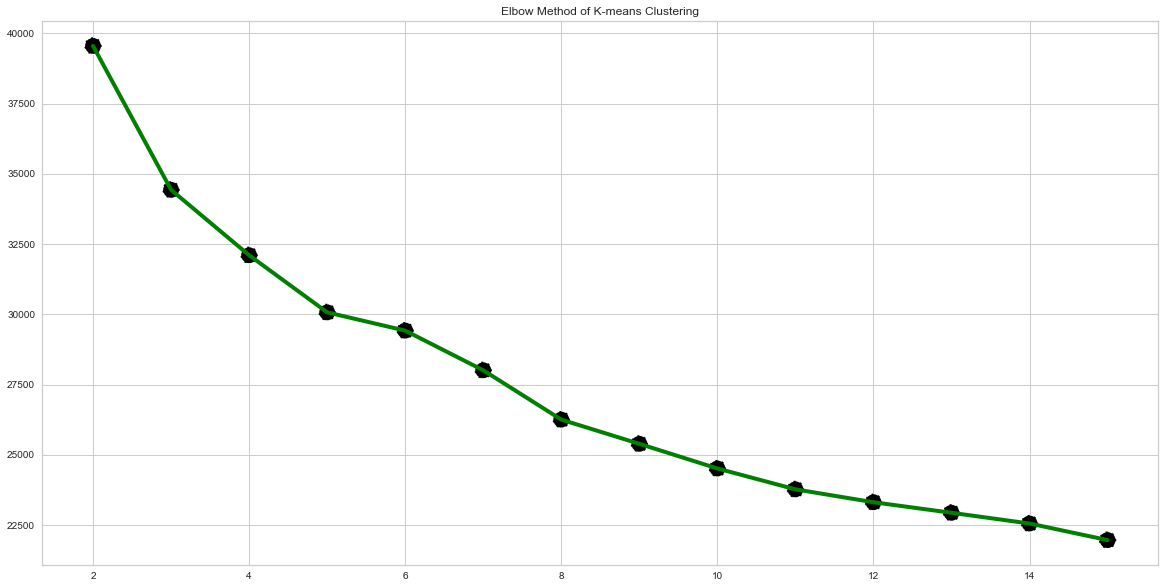

In [82]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=[ 'Education', 'Marital_Status', 'Age_range']).copy()
inertia = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 16), y=inertia, color='green', linewidth = 4)
sns.scatterplot(x=range(2, 16), y=inertia, s=300, color='black',  linestyle='--')

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='Total_spending', ylabel='Income'>

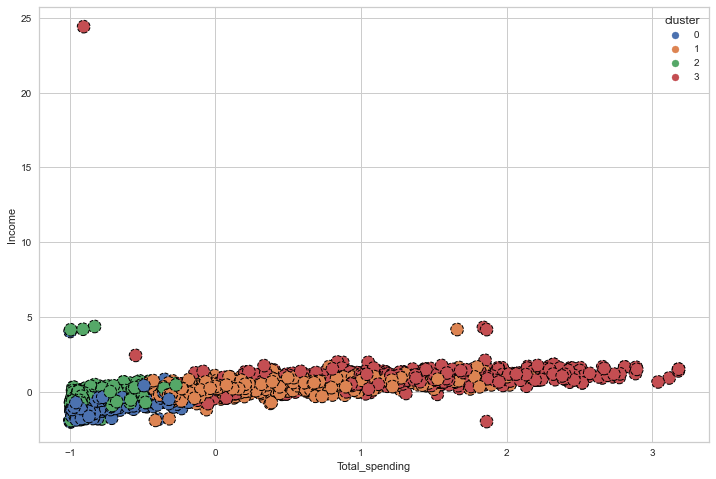

In [86]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    x='Total_spending', y='Income',
    hue='cluster',
    edgecolor='black',
    linestyle='--',
    data=X,
    palette="deep",
    s=160,
    ax=ax
)

In [87]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

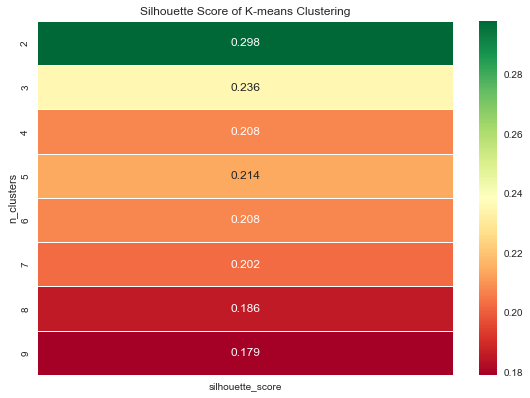

In [88]:
visualize_silhouette_layer(X)

In [89]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Join_at_age,Total_kids,is_parents,Age_range,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped,cluster
0,S1,Single,58138000.0,0,0,635000,88000,546000,172000,88000,...,55,0,0,Older adults,1617000,0,25,3.571429,2,3
1,S1,Single,46344000.0,1,1,11000,1000,6000,2000,1000,...,60,2,1,Older adults,27000,0,6,1.200000,2,2
2,S1,Couple,71613000.0,0,0,426000,49000,127000,111000,21000,...,48,0,0,Older adults,776000,0,21,5.250000,2,3
3,S1,Couple,26646000.0,1,0,11000,4000,20000,10000,3000,...,30,1,1,Middle age adults,53000,0,8,1.333333,2,0
4,S3,Couple,58293000.0,1,0,173000,43000,118000,46000,27000,...,33,1,1,Middle age adults,422000,0,19,3.800000,4,1


In [91]:
df_group_cluster = df.groupby(['cluster']).agg({'Total_spending': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max']})
df_group_cluster

Total_spending                                           Income  \
                 count          mean     median     min      max  count   
cluster                                                                   
0                  598  1.054247e+05    63000.0    5000   680000    598   
1                  588  8.654201e+05   817000.0  322000  2092000    588   
2                  528  1.349602e+05    90500.0    8000   459000    528   
3                  502  1.398624e+06  1377000.0   62000  2525000    502   

                                                           
                 mean      median        min          max  
cluster                                                    
0        2.996666e+07  29760000.0  1730000.0  153924000.0  
1        6.138230e+07  61338500.0  4428000.0  157243000.0  
2        4.314180e+07  42935000.0  4023000.0  162397000.0  
3        7.766570e+07  77320000.0  2447000.0  666666000.0

In [114]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Middle Spender',
    2 : 'Low Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

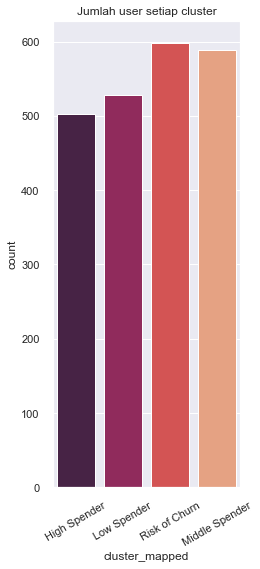

In [115]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'], palette='rocket')
plt.title('Jumlah user setiap cluster')
plt.xticks(rotation=30)
plt.show()

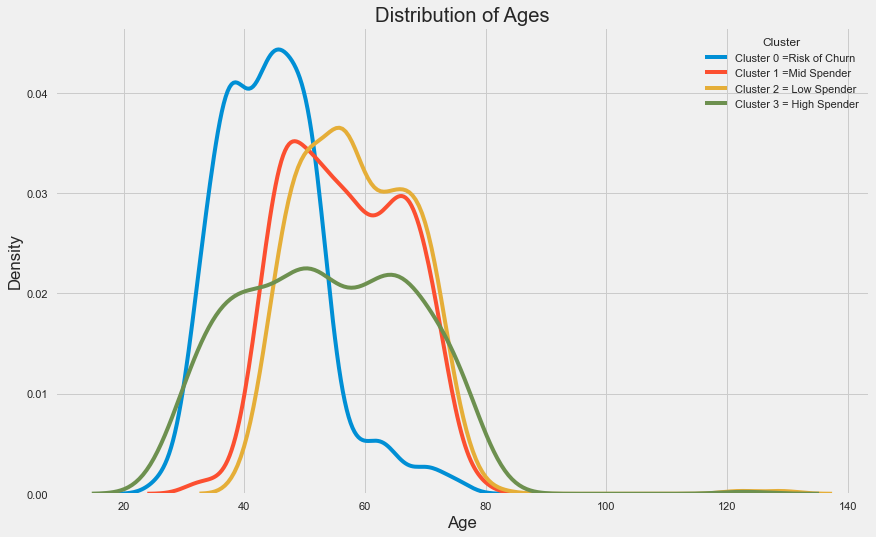

In [117]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'Age'])

# Labeling of plot

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(labels=["Cluster 0 =Risk of Churn","Cluster 1 =Mid Spender ","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

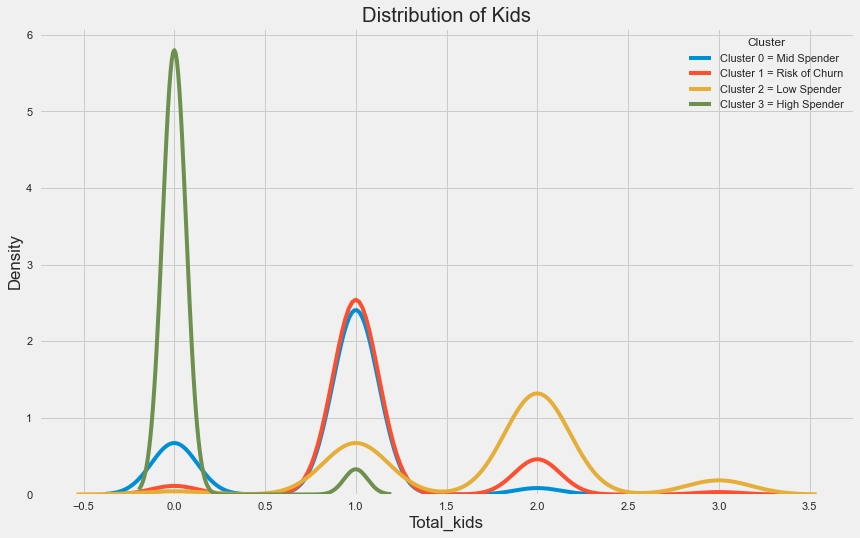

In [95]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'Total_kids'])

# Labeling of plot

plt.xlabel('Total_kids')
plt.ylabel('Density')
plt.title('Distribution of Kids')
plt.legend(labels=["Cluster 0 = Mid Spender","Cluster 1 = Risk of Churn","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

In [96]:
df['Total_kids'].value_counts()

1    1117
0     633
2     416
3      50
Name: Total_kids, dtype: int64

In [97]:
dfc0 = df[df['cluster'] == 0]
dfc1 = df[df['cluster'] == 1]
dfc2 = df[df['cluster'] == 2]
dfc3 = df[df['cluster'] == 3]

In [98]:
dfc0['Age_range'].value_counts()

Middle age adults    466
Young adults          81
Older adults          51
Name: Age_range, dtype: int64

In [99]:
dfc1['Age_range'].value_counts()

Older adults         322
Middle age adults    262
Young adults           4
Name: Age_range, dtype: int64

In [100]:
dfc2['Age_range'].value_counts()

Older adults         334
Middle age adults    194
Name: Age_range, dtype: int64

In [101]:
dfc3['Age_range'].value_counts()

Older adults         236
Middle age adults    205
Young adults          61
Name: Age_range, dtype: int64

Text(0.5, 1.0, 'Income per Cluster')

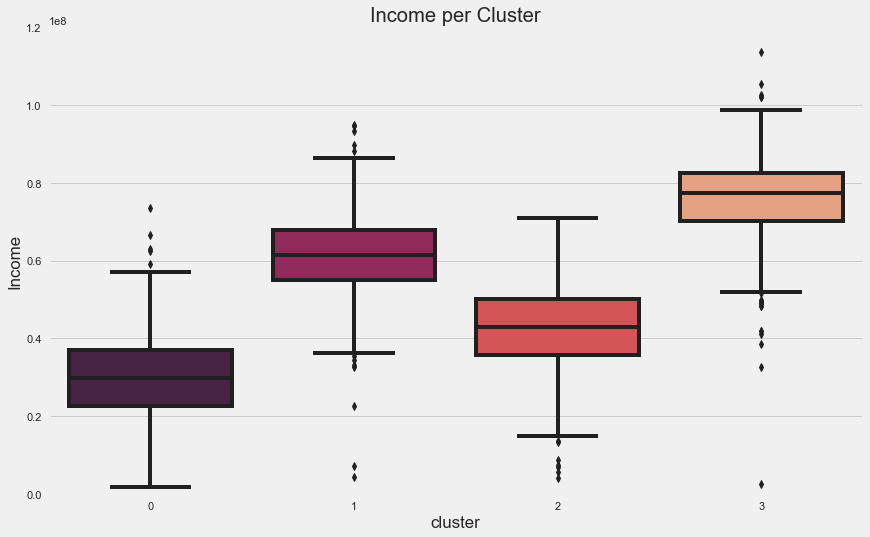

In [102]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Income", data=df, palette='rocket')
plt.ylim(0, 120000000)
plt.title('Income per Cluster')

Text(0.5, 1.0, 'Spending per Cluster')

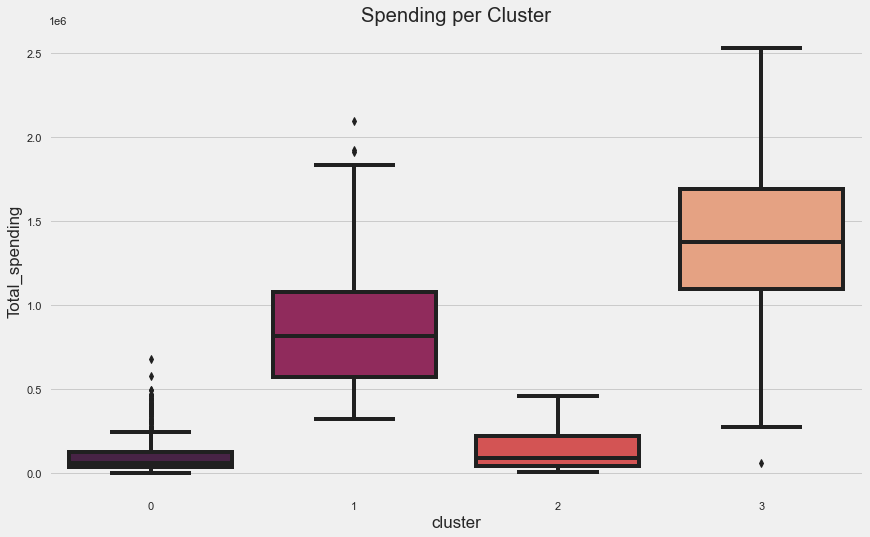

In [104]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Total_spending", data=df, palette='rocket')
plt.title('Spending per Cluster')

Text(0.5, 1.0, 'Conversion rate per Cluster')

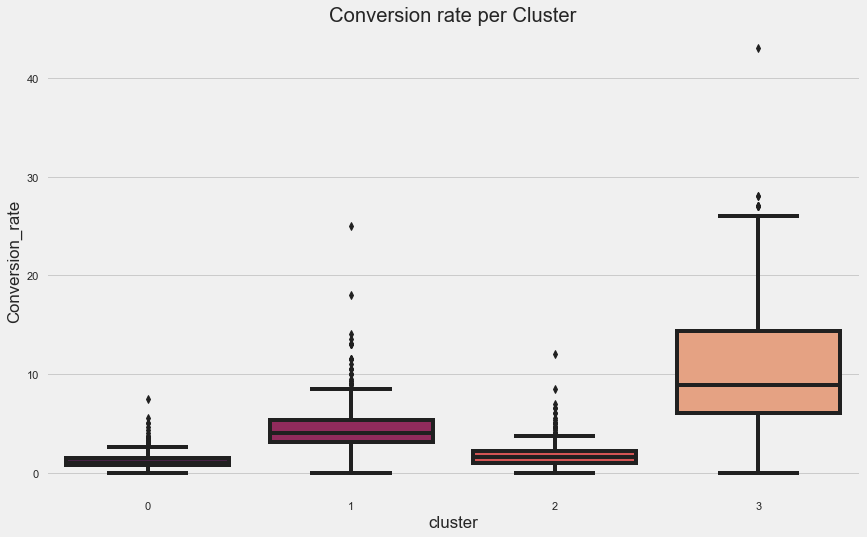

In [105]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Conversion_rate", data=df, palette='rocket')
plt.title('Conversion rate per Cluster')

Text(0.5, 1.0, 'Total deal purchases per Cluster')

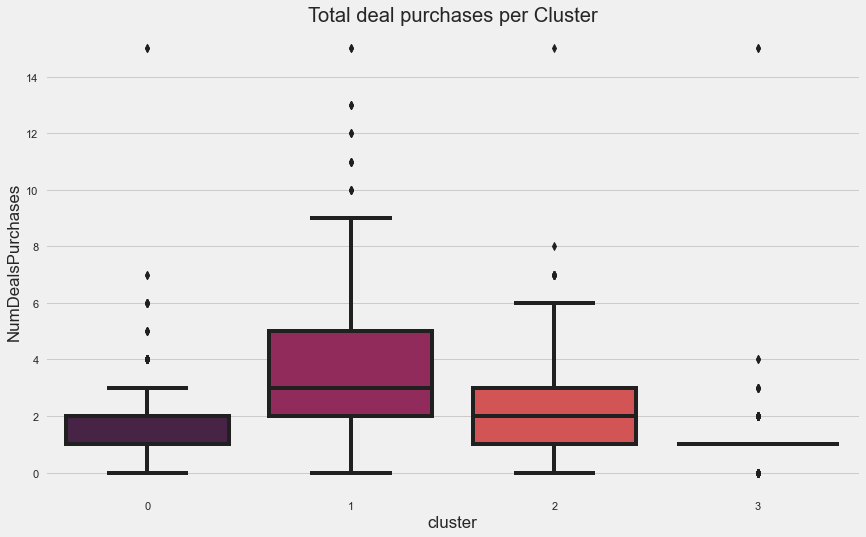

In [106]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="NumDealsPurchases", data=df, palette='rocket')
plt.title('Total deal purchases per Cluster')

Scatterplot untuk kolom Income dan cluster


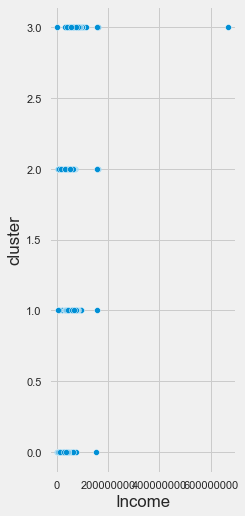

Scatterplot untuk kolom Total_spending dan cluster


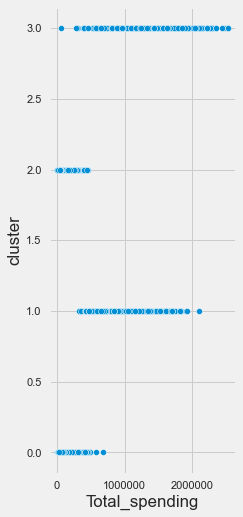

Scatterplot untuk kolom Conversion_rate dan cluster


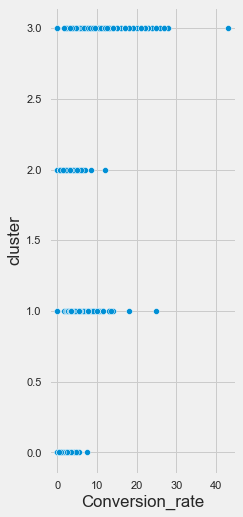

Scatterplot untuk kolom Age dan cluster


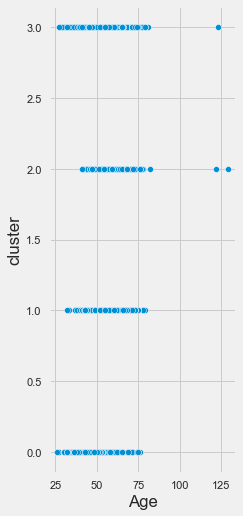

In [113]:
col = ['Income', 'Total_spending', 'Conversion_rate', 'Age', 'cluster']
for i in col: 
  if i != 'cluster':
    print('Scatterplot untuk kolom', i, "dan cluster")
    sns.scatterplot(data=df, x=i, y='cluster')
    plt.ticklabel_format(style='plain')
    plt.show()

In [119]:
df['cluster'].value_counts(normalize =True)

0    0.269856
1    0.265343
2    0.238267
3    0.226534
Name: cluster, dtype: float64

In [122]:
map_spending = {
    0:'Mid Spender',
    1:'Risk of Churn',
    2:'Low Spender',
    3:'High Spender'
}

df['cluster'] = df['cluster'].map(map_spending)

In [124]:
#Informasi untuk mid spender
df[df['cluster'] == 'Mid Spender'].select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Income,598.0,2.996666e+07,1.183352e+07,1730000.0,22465500.00,29760000.0,37075250.0,153924000.0
Kidhome,598.0,7.959866e-01,4.614273e-01,0.0,1.00,1.0,1.0,2.0
Teenhome,598.0,1.839465e-02,1.344862e-01,0.0,0.00,0.0,0.0,1.0
MntCoke,598.0,3.470401e+04,5.362670e+04,0.0,5000.00,14000.0,37000.0,351000.0
MntFruits,598.0,6.899666e+03,1.009901e+04,0.0,1000.00,3000.0,8000.0,87000.0
MntMeatProducts,598.0,2.752676e+04,3.283952e+04,0.0,8000.00,15000.0,30000.0,217000.0
MntFishProducts,598.0,1.042140e+04,1.680860e+04,0.0,2000.00,6000.0,13000.0,179000.0
MntSweetProducts,598.0,6.954849e+03,9.516078e+03,0.0,1000.00,4000.0,9000.0,78000.0
MntGoldProds,598.0,1.891806e+04,2.627164e+04,0.0,5000.00,11000.0,22000.0,262000.0
NumDealsPurchases,598.0,1.861204e+00,1.352137e+00,0.0,1.00,1.0,2.0,15.0


In [125]:
#Informasi untuk Risk of Churn
df[df['cluster'] == 'Risk of Churn'].select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Income,588.0,6.138230e+07,1.158478e+07,4428000.0,5.499450e+07,61338500.0,67897500.00,157243000.0
Kidhome,588.0,1.887755e-01,4.002680e-01,0.0,0.000000e+00,0.0,0.00,2.0
Teenhome,588.0,9.421769e-01,3.872632e-01,0.0,1.000000e+00,1.0,1.00,2.0
MntCoke,588.0,5.141497e+05,2.799533e+05,16000.0,3.075000e+05,458500.0,664500.00,1459000.0
MntFruits,588.0,3.282313e+04,3.842339e+04,0.0,6.000000e+03,18500.0,47250.00,199000.0
MntMeatProducts,588.0,1.719286e+05,1.286561e+05,12000.0,8.575000e+04,141000.0,223000.00,1582000.0
MntFishProducts,588.0,4.374490e+04,5.136315e+04,0.0,8.000000e+03,23000.0,62250.00,259000.0
MntSweetProducts,588.0,3.394728e+04,4.070318e+04,0.0,6.000000e+03,18500.0,46000.00,195000.0
MntGoldProds,588.0,6.882653e+04,5.657056e+04,0.0,2.700000e+04,50000.0,99250.00,321000.0
NumDealsPurchases,588.0,3.622449e+00,2.356687e+00,0.0,2.000000e+00,3.0,5.00,15.0


In [126]:
#Informasi untuk Low Spender
df[df['cluster'] == 'Low Spender'].select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Income,528.0,4.314180e+07,1.425884e+07,4023000.0,35700000.0,4.293500e+07,5.014100e+07,162397000.0
Kidhome,528.0,7.215909e-01,5.579746e-01,0.0,0.0,1.000000e+00,1.000000e+00,2.0
Teenhome,528.0,1.020833e+00,2.568634e-01,0.0,1.0,1.000000e+00,1.000000e+00,2.0
MntCoke,528.0,7.757576e+04,7.696532e+04,2000.0,19000.0,4.900000e+04,1.110000e+05,406000.0
MntFruits,528.0,4.174242e+03,7.368322e+03,0.0,0.0,1.000000e+03,5.000000e+03,65000.0
MntMeatProducts,528.0,2.716288e+04,2.612334e+04,1000.0,8000.0,1.700000e+04,3.800000e+04,147000.0
MntFishProducts,528.0,6.246212e+03,1.295680e+04,0.0,0.0,3.000000e+03,7.000000e+03,150000.0
MntSweetProducts,528.0,4.164773e+03,7.083490e+03,0.0,0.0,2.000000e+03,5.000000e+03,67000.0
MntGoldProds,528.0,1.563636e+04,1.720212e+04,0.0,4000.0,9.500000e+03,2.200000e+04,110000.0
NumDealsPurchases,528.0,2.568182e+00,1.650453e+00,0.0,1.0,2.000000e+00,3.000000e+00,15.0


In [127]:
#Informasi untuk high Spender
df[df['cluster'] == 'High Spender'].select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Income,502.0,7.766570e+07,2.895508e+07,2447000.0,7.019550e+07,7.732000e+07,8.258350e+07,666666000.0
Kidhome,502.0,2.191235e-02,1.465434e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
Teenhome,502.0,3.187251e-02,1.758358e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
MntCoke,502.0,6.216135e+05,3.287864e+05,1000.0,3.690000e+05,5.850000e+05,8.477500e+05,1493000.0
MntFruits,502.0,6.528884e+04,5.054164e+04,0.0,2.500000e+04,5.050000e+04,9.975000e+04,197000.0
MntMeatProducts,502.0,4.744343e+05,2.498809e+05,3000.0,2.880000e+05,4.380000e+05,6.397500e+05,1725000.0
MntFishProducts,502.0,9.592231e+04,6.541475e+04,0.0,4.000000e+04,8.400000e+04,1.450000e+05,254000.0
MntSweetProducts,502.0,6.688645e+04,5.173374e+04,0.0,2.625000e+04,5.400000e+04,9.800000e+04,262000.0
MntGoldProds,502.0,7.447809e+04,6.110554e+04,0.0,2.925000e+04,5.300000e+04,1.080000e+05,249000.0
NumDealsPurchases,502.0,1.095618e+00,1.000409e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,15.0
